### Data Preprocessing:

### 1.	Import the necessary libraries and read the data.

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [556]:
ff=pd.read_csv('fifa.csv')
fin=pd.read_csv('fifa_ variable_information.csv')

### 2.	Drop any columns that you deem unecessary for analysis.

In [557]:
ff=ff.drop(['Photo','Nationality','Flag','Club Logo','Jersey Number'],axis=1)
print(ff.isnull().sum()/len(ff)*100)
print('''From this we can see that the 'Loaned From' column has a very high percentage of null values
meaning that it is not going to be unecessary for further analysis. Therefore we can drop this column.''')
ff=ff.drop(['Loaned From'],axis=1)
ff

ID                           0.000000
Name                         0.000000
Age                          0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve       

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,47,67,Cambridge United,€60K,€1K,Right,1.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


### 3.	The following columns need to be converted for further analysis:

Converting the 'Value' column

In [558]:
ff['Value']=ff['Value'].str.strip('€')
l=[]
for i in ff['Value']:
    if i[-1]=='M':
        j=float(i.strip('M'))*1000000
        l.append(j)
    elif i[-1]=='K':
        j=float(i.strip('K'))*1000
        l.append(j)
    else:
        l.append(float(i))
ff['Value']=l
ff['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

Converting the 'Wage' column

In [559]:
ff['Wage']=ff['Wage'].str.strip('€')
l=[]
for i in ff['Wage']:
    if i[-1]=='M':
        j=float(i.strip('M'))*1000000
        l.append(j)
    elif i[-1]=='K':
        j=float(i.strip('K'))*1000
        l.append(j)
    else:
        l.append(float(i))
ff['Wage']=l
ff['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

Converting the 'Joined' column

In [560]:
l=[]
for i in ff['Joined']:
    if i!=np.nan:
        if type(i)==float:
            l.append(i)
        else:
            l.append(i[-4:])
    else:
        l.append(i)
ff['Joined']=l
ff['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: object

Converting 'Contract Valid Until' Column

In [561]:
ff['Contract Valid Until']=ff['Contract Valid Until'].astype('datetime64')
ff['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

Converting 'Height' Column

In [562]:
ff['Height']=ff['Height'].astype('str')
l=[]
for i in ff['Height']:
    j=i.replace("'",'.')
    l.append(float(j))
ff['Height']=l
ff['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

Converting 'Weight' Column

In [563]:
l=[]
for i in ff['Weight']:
    j=str(i).strip('lbs')
    l.append(float(j))
ff['Weight']=l
ff['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

Converting 'Release Clause' Column

In [564]:
ff['Release Clause']=ff['Release Clause'].str.strip('€')
l=[]
for i in ff['Release Clause']:
    if str(i)[-1]=='M':
        j=float(i.strip('M'))*1000000
        l.append(j)
    elif str(i)[-1]=='K':
        j=float(i.strip('K'))*1000
        l.append(j)
    else:
        l.append(float(i))
ff['Release Clause']=l
ff['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

### 4.	Check for missing values and do a mean imputation where necessary. 

Since the 'Joined' column can be considered as a categorical column,
it can be treated by filling the null values with the mode value.


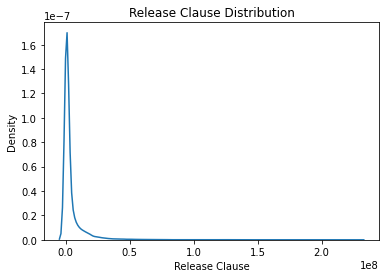

Since the distribution of the 'Release Clause' column is right skewed,
it can be treated by filling the null values with the median value.


In [565]:
print('''Since the 'Joined' column can be considered as a categorical column,
it can be treated by filling the null values with the mode value.''')
ff['Joined']=ff['Joined'].fillna(ff['Joined'].mode())
sns.kdeplot(ff['Release Clause'])
plt.title('Release Clause Distribution')
plt.show()
print('''Since the distribution of the 'Release Clause' column is right skewed,
it can be treated by filling the null values with the median value.''')
ff['Release Clause']=ff['Release Clause'].fillna(ff['Release Clause'].median())

### Exploratory Analysis:

### 1. Plot the distribution of Overall rating for all players. 

C:\Users\moham\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


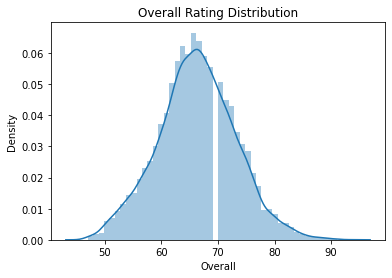

In [566]:
sns.distplot(ff['Overall'])
plt.title('Overall Rating Distribution')
plt.show()

### 2. Generate pair plots for the following variables:

### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

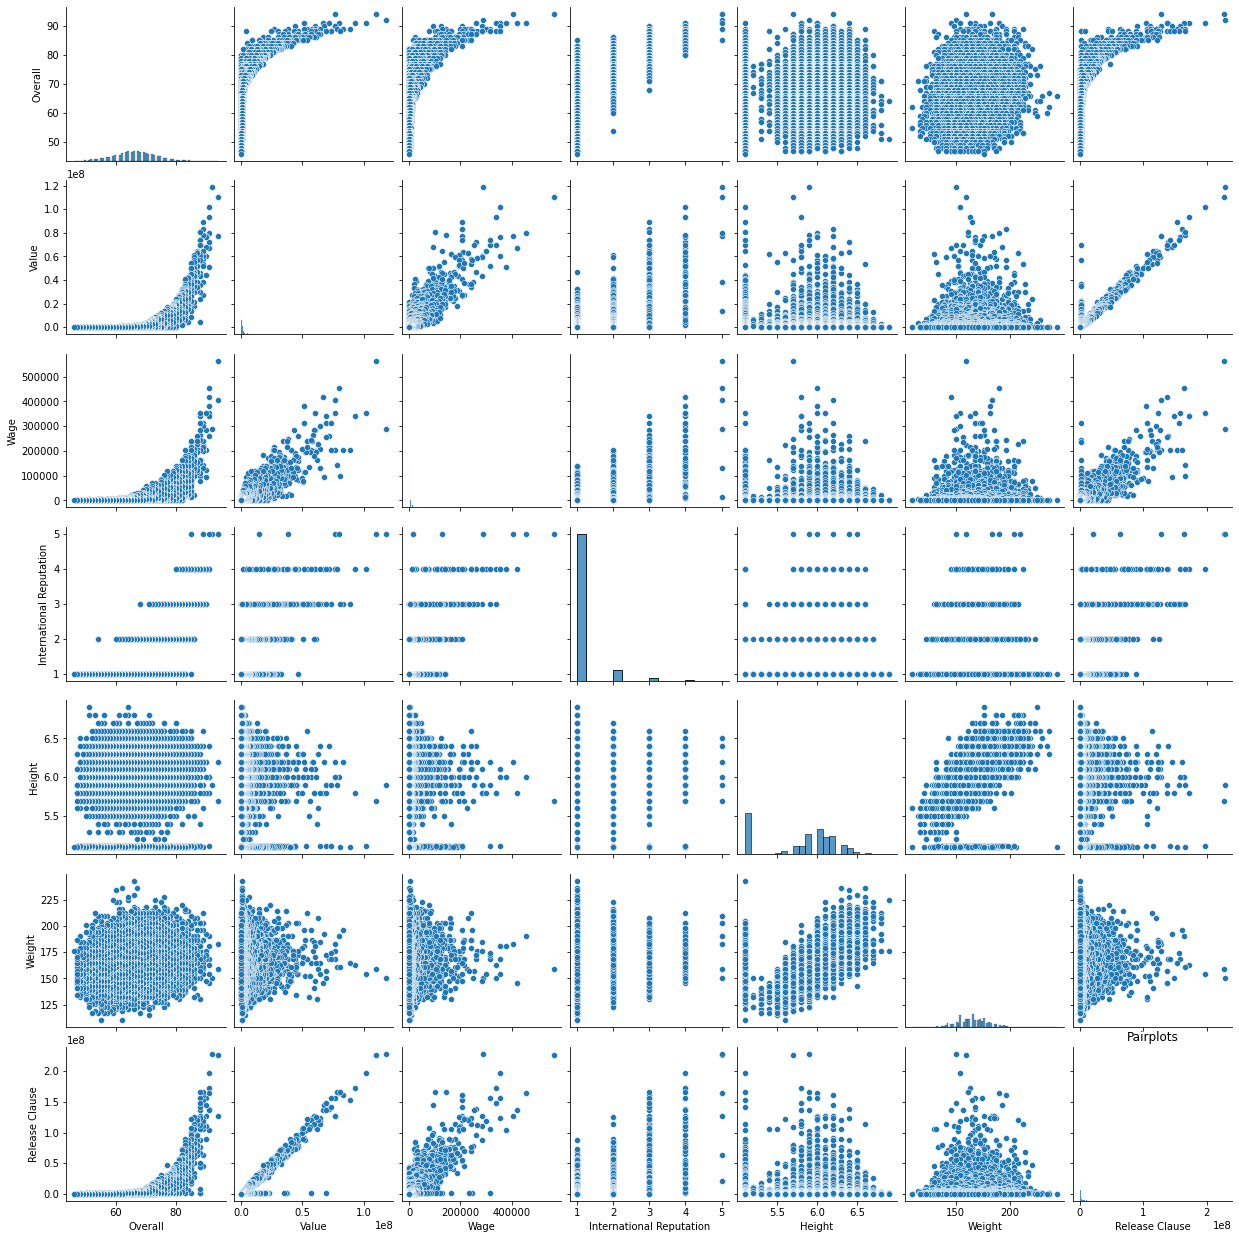

In [547]:
sns.pairplot(data=ff,vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'])
plt.title('Pairplots')
plt.show()

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [567]:
top20=ff[ff['Contract Valid Until']=='2020']
top20=top20.sort_values(by='Overall',ascending=False)
top20=top20.head(20)
top20

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,90,90,Manchester City,60000000.0,285000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,87,87,Napoli,45000000.0,135000.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


### a) What would the average wage for this set of players be?

In [568]:
print('The average wage for the top 20 players is:',top20['Wage'].mean())

The average wage for the top 20 players is: 205450.0


### b)	What is the average age?

In [569]:
print('The average age is:',top20['Age'].mean())

The average age is: 30.65


### c) Is there a correlation between the Overall rating and Value for these players?

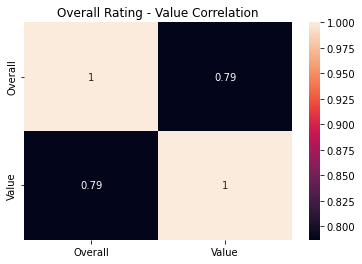

Yes. There is a positive correlation of magnitude 0.79
between the overall rating and the value of the players.


In [570]:
sns.heatmap(top20[['Overall','Value']].corr(),annot=True)
plt.title('Overall Rating - Value Correlation')
plt.show()
print('''Yes. There is a positive correlation of magnitude 0.79
between the overall rating and the value of the players.''')

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [571]:
aps=[]
ps=ff['Position'].unique()
for i in ps:
    p=ff[ff['Position']==i].sort_values(by='Overall',ascending=False).head(5)
    aps.append(p)
dfps=pd.concat(aps)
dfps.head(150)

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
50,175943,D. Mertens,31,87,87,Napoli,45000000.0,135000.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0
528,172114,D. Valeri,32,80,80,Portland Timbers,11500000.0,12000.0,Right,2.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17300000.0
890,150516,L. Podolski,33,78,78,Vissel Kobe,6500000.0,11000.0,Left,3.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8100000.0
1774,201313,C. Ciano,28,75,75,Frosinone,6500000.0,17000.0,Left,1.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,200536,N. Schulz,25,80,81,TSG 1899 Hoffenheim,14500000.0,37000.0,Left,1.0,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000.0
605,208334,J. Hector,28,79,79,1. FC Köln,10000000.0,26000.0,Left,3.0,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000.0
581,223682,Granell,29,79,79,Girona FC,12000000.0,37000.0,Left,1.0,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000.0
601,210455,Jonny,24,79,83,Wolverhampton Wanderers,13500000.0,43000.0,Right,2.0,...,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,1100000.0


### a) Are there any players appearing in more than one Table. Please point out such players.

In [572]:
print('''No. There are no players appearing in more than one table.
This is because each player only has one specific position.''')
dfps[dfps['Name'].duplicated()]

No. There are no players appearing in more than one table.
This is because each player only has one specific position.


,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


### b) What is the average wage one can expect to pay for the top 5 in every position?

In [573]:
print('The average wage one can expect to pay for the top 5 in every position is:')
dfps.groupby('Position')['Wage'].mean()

The average wage one can expect to pay for the top 5 in every position is:


Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64